<a href="https://colab.research.google.com/github/Meera-Ajay-25/Machine-Learning-projects/blob/main/Campus_placement_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1: **Analysis on campus Recruitment Data of Mba students**

Algorithm Used: **KNearest Neighbors**

Steps: 

*   Loading the Dataset using Pandas library
*   Preprocessing the dataset


*   Scaling the dataset using MinMax scaler
*   Splitting the dataset


*   Model building using Knn Algorithm
*   Testing the accurcay of the algorithm and constructing confusion matrix












In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [ ]:
#loading the dataset
df=pd.read_csv("/content/Placement_Data_Full_Class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


**Data Preprocessing**

In [ ]:
df.shape

(215, 15)

In [ ]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df1=df.copy()
df1.drop(['sl_no','ssc_b','hsc_b'],axis=1,inplace=True)
df1

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['gender','hsc_s','degree_t','workex','specialisation','status']
for i in lst:
  df1[i]=le.fit_transform(df1[i])

In [ ]:
df1

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,NaN
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
df1.dtypes

gender              int64
ssc_p             float64
hsc_p             float64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary            float64
dtype: object

In [ ]:
#Filling the missing values in the column salary
df1['salary']=df1['salary'].fillna(df1['salary'].mode()[0])

**Model building using KNN**

In [ ]:
X=df1.iloc[:,:10]
y=df1.iloc[:,-2]

In [ ]:
#scaling the dataset using Min-Max scaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)
X_sc

array([[1.        , 0.53823954, 0.88962109, ..., 0.10416667, 1.        ,
        0.28448276],
       [1.        , 0.79241394, 0.68088962, ..., 0.76041667, 0.        ,
        0.56484258],
       [1.        , 0.49701093, 0.5107084 , ..., 0.52083333, 0.        ,
        0.2470015 ],
       ...,
       [1.        , 0.53823954, 0.49423394, ..., 0.1875    , 0.        ,
        0.69377811],
       [0.        , 0.68253968, 0.47775947, ..., 0.41666667, 1.        ,
        0.33808096],
       [1.        , 0.43516801, 0.34596376, ..., 0.8125    , 1.        ,
        0.33770615]])

In [ ]:
#splitting the dataset to train data and test data
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=1)

In [ ]:
#Using KNN model
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#prediction
y_pred=Knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
y_test.values

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
#testing the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

81.3953488372093


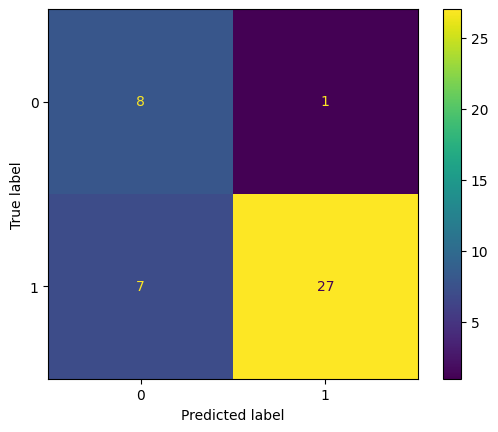

In [ ]:
#plotting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.96      0.79      0.87        34

    accuracy                           0.81        43
   macro avg       0.75      0.84      0.77        43
weighted avg       0.87      0.81      0.83        43



In [ ]:
#predicting using new values
y_new=Knn.predict(ms.transform([[1,89,90,1,77,1,1,75,1,74]]))
if y_new==1:
  print("Placed")
else:
  print("Not Placed")

Placed


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
